## Introduction
In this notebook, we aim to predict the different categories of Iris flower. We will use the K-Neariest Neighbor (KNN) algorithm for classification. We will go through the process of loading the dataset, standardizing the features, splitting the data into training and test sets, and training the model using KNN.

# Importing Tools And Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,  confusion_matrix

c:\Users\AttiqRafiq\.conda\envs\pyml39\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading the DataFrame

In [2]:
df = pd.read_csv("iris Dataset\Iris.csv")
print("DataFrame has been loaded")

DataFrame has been loaded


# Learing About the data set

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Droping The Id Coloumn 

In [5]:
df.drop("Id", axis='columns',inplace = True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Making A corealtion HeatMap

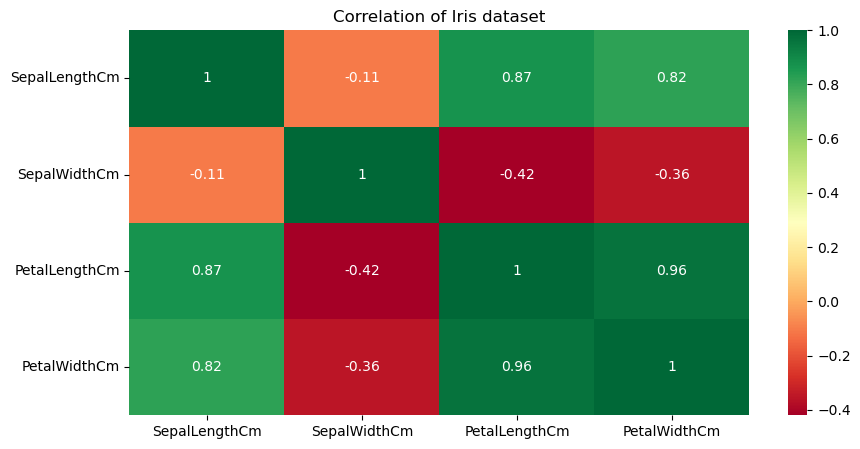

In [7]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']) # numeric values only

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot= True, cmap='RdYlGn')
plt.title("Correlation of Iris dataset")
plt.show()

# Select features and target


In [8]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Scaling / Standardizing the data

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X,y)

X = scaler.fit_transform(X)

# Split data into training and testing sets



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the model (k-NN with k=3)



In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

# Make predictions


In [12]:
y_pred = knn.predict(X)

# Evaluate the model


In [13]:
y_pred = knn.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)  
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


# Predict for new data


In [14]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    return knn.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0]

# Example usage



In [15]:
species = predict_species(5.1, 3.5, 1.4, 0.2) # this is the data of Iris-setosa
print(f"Predicted Species: {species}")

Predicted Species: Iris-setosa


c:\Users\AttiqRafiq\.conda\envs\pyml39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Finding Error with changed k

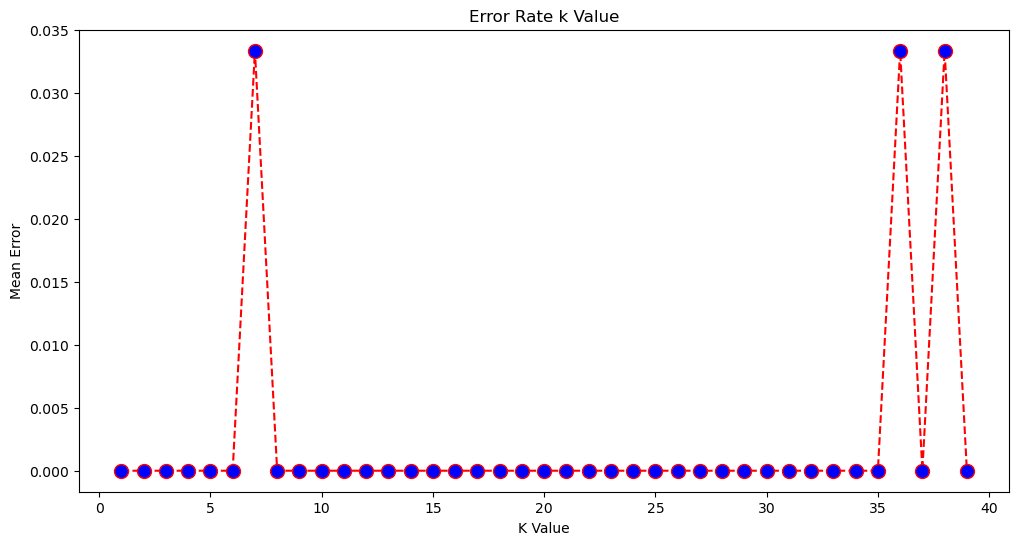

In [16]:
error = []
# Calculating error for k values between 1 and 40

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate k Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [17]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
prediction = clf.predict(X_test)

# CHALLENGE compare their reusults and print the best one!
accuracy = accuracy_score(y_test, prediction)  
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


# Thank You